<a href="https://colab.research.google.com/github/Abdoelmon/Educational-system-/blob/main/projectdatabase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- Data Preprocessing**


# ***> Read Dataset***

**Load the dataset ( using pandas.read_csv()).**

**Inspect the data structure (.head(), .info(), .describe()).**

In [84]:
import pandas as pd
df = pd.read_csv('Housing_Price_Data.csv')

In [85]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [87]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# ***> Explore the Data***

**Identify numerical and categorical columns**

In [88]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [89]:
num_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [90]:
cat_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Display the number of unique categories in each categorical column.**

In [91]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()} {df[col].nunique()} categories")

mainroad: ['yes' 'no'] 2 categories
guestroom: ['no' 'yes'] 2 categories
basement: ['no' 'yes'] 2 categories
hotwaterheating: ['no' 'yes'] 2 categories
airconditioning: ['yes' 'no'] 2 categories
prefarea: ['yes' 'no'] 2 categories
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished'] 3 categories


# ***> Handle Missing Values***

**Check for missing values in each column**

In [92]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()} missing values")

price: 0 missing values
area: 0 missing values
bedrooms: 0 missing values
bathrooms: 0 missing values
stories: 0 missing values
mainroad: 0 missing values
guestroom: 0 missing values
basement: 0 missing values
hotwaterheating: 0 missing values
airconditioning: 0 missing values
parking: 0 missing values
prefarea: 0 missing values
furnishingstatus: 0 missing values


**Visualize the distribution of each column ( using histograms or skewnes statistics).**

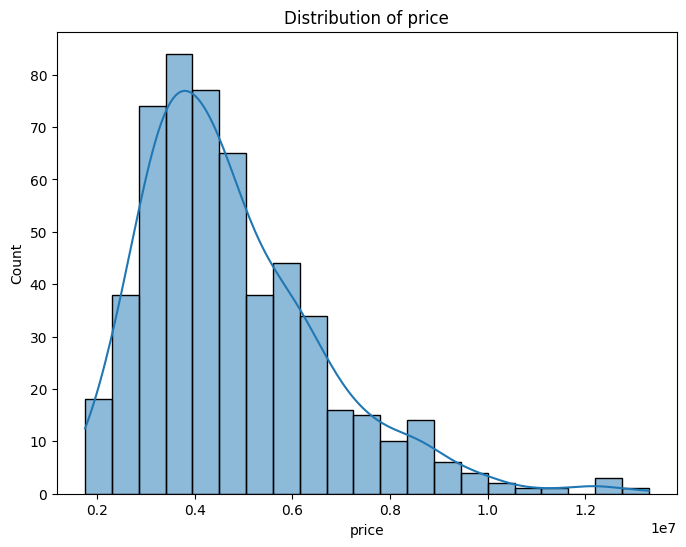

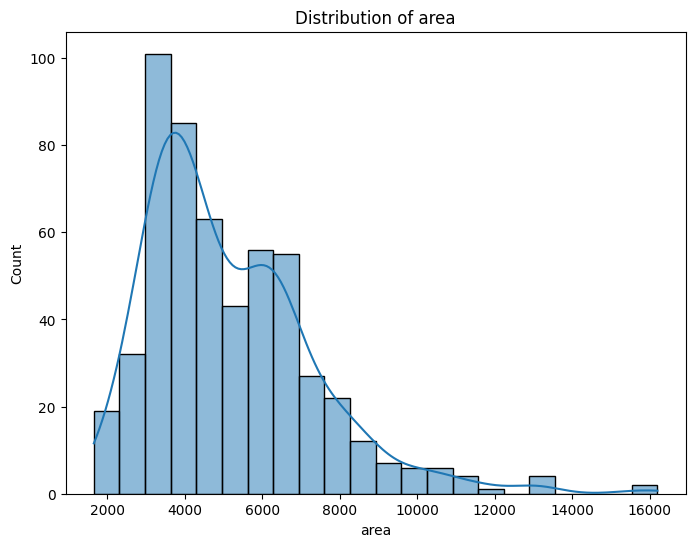

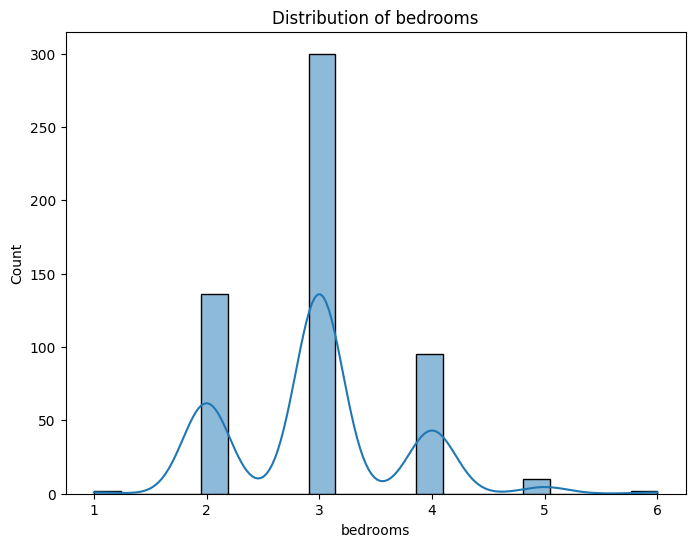

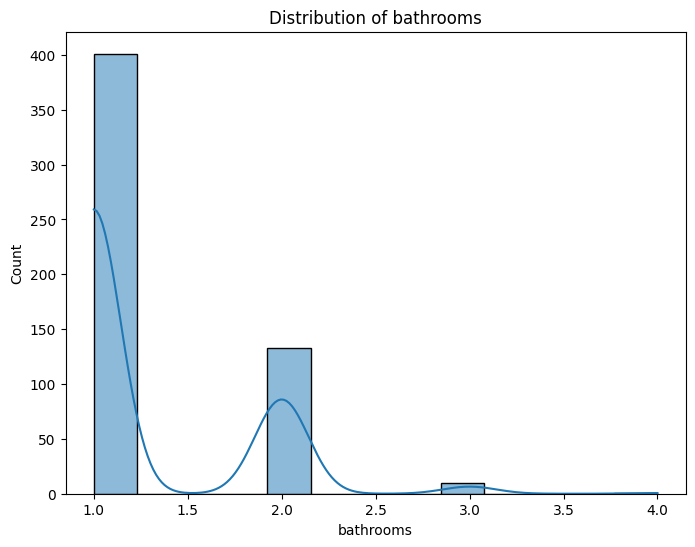

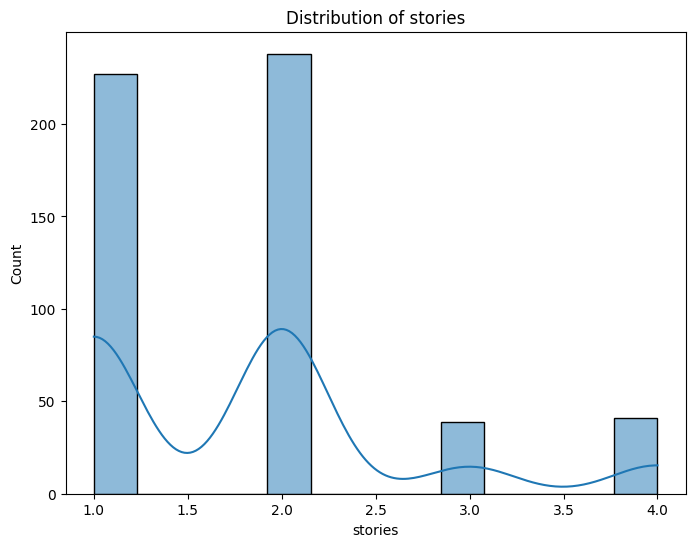

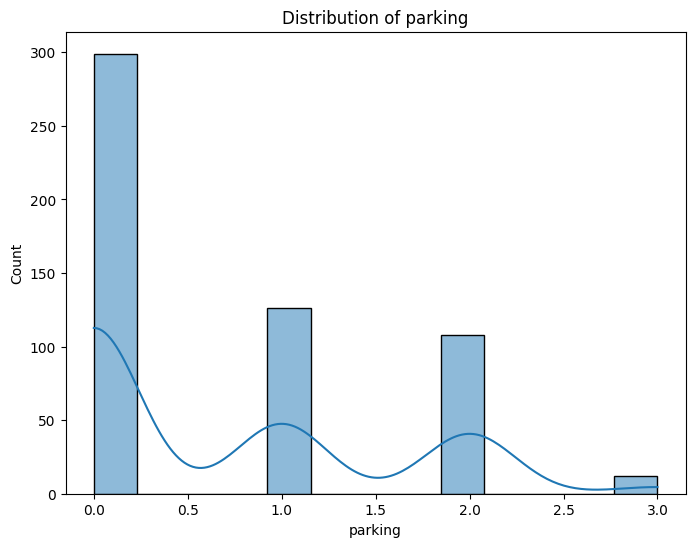

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [94]:
df.isnull().sum().sum()

0

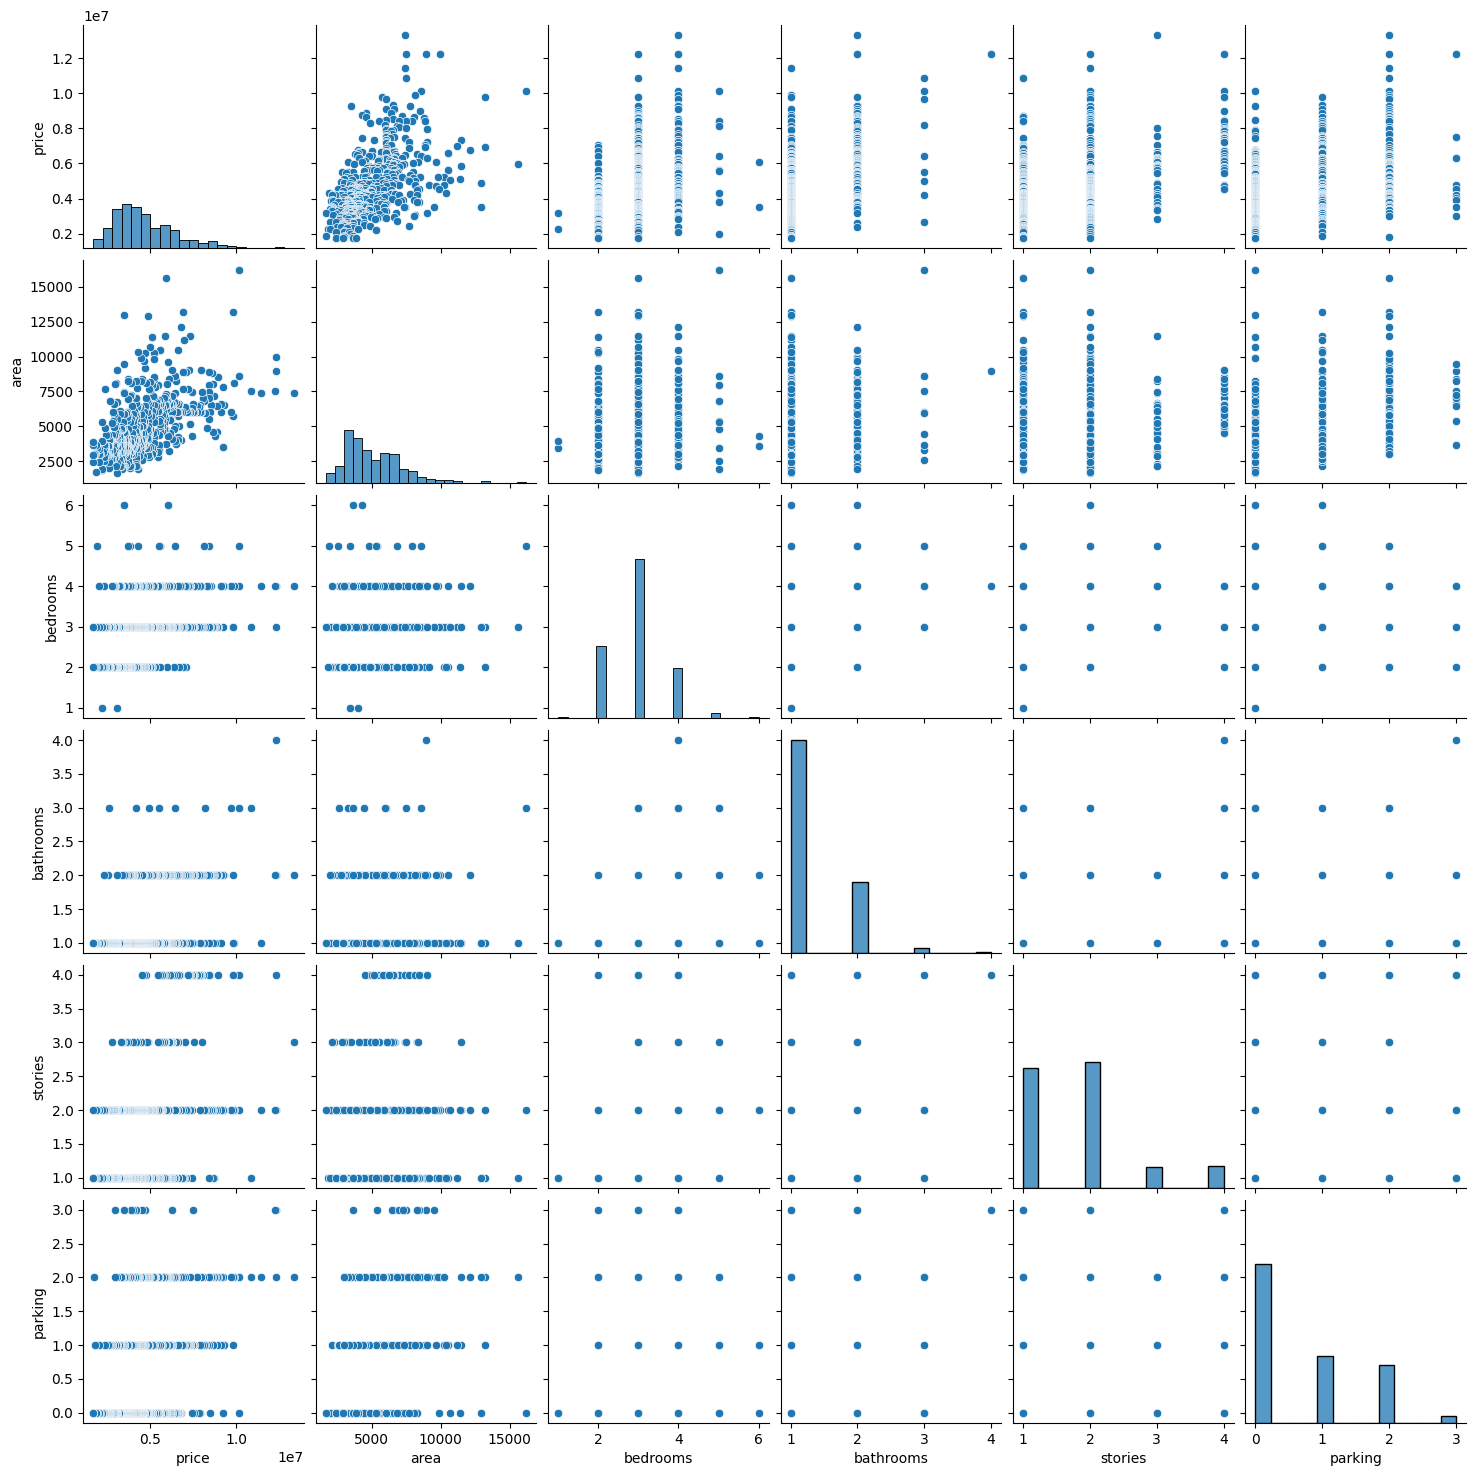

In [95]:
pairplot = sns.pairplot(df)
plt.show()

# ***> Outlier Detection and Treatment***

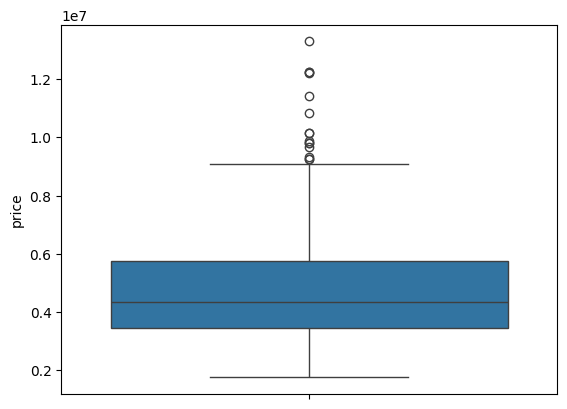

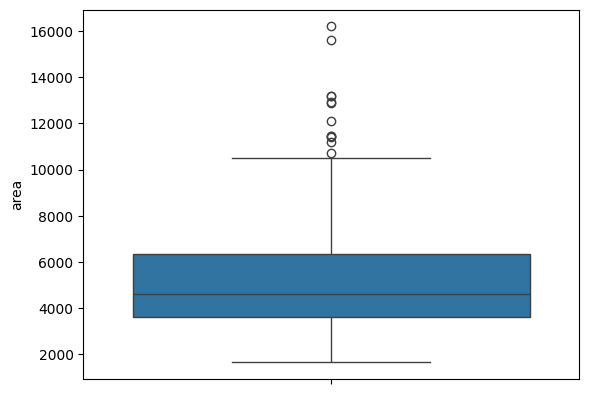

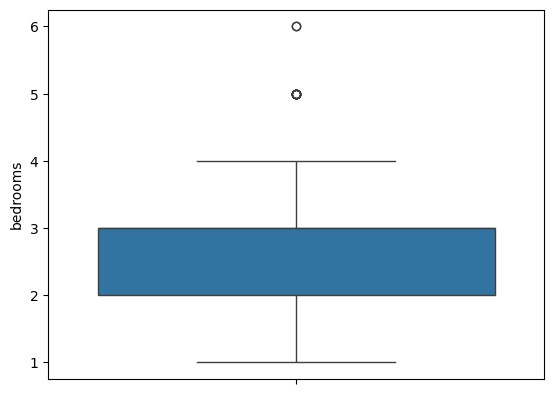

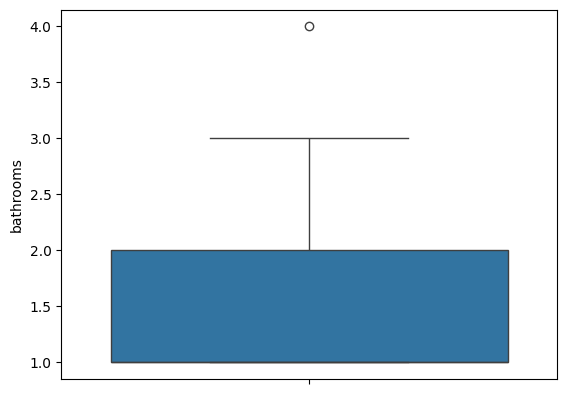

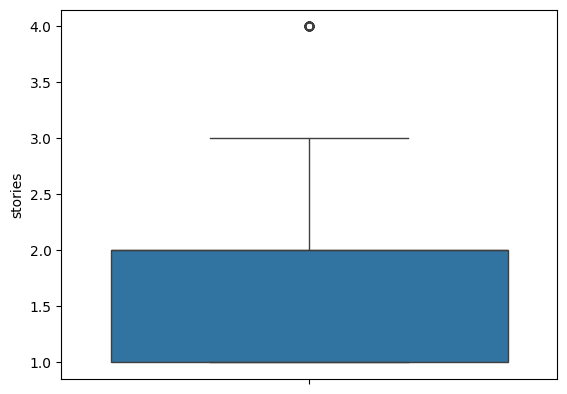

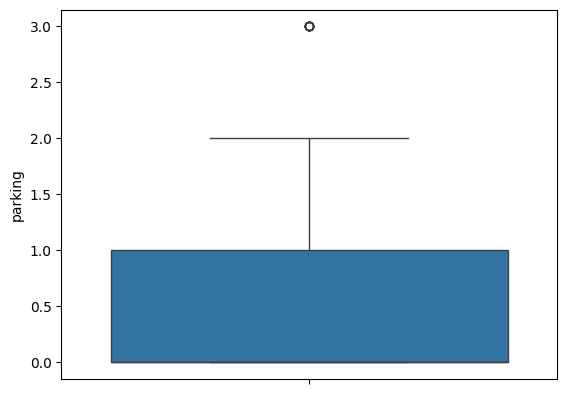

In [96]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

In [97]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


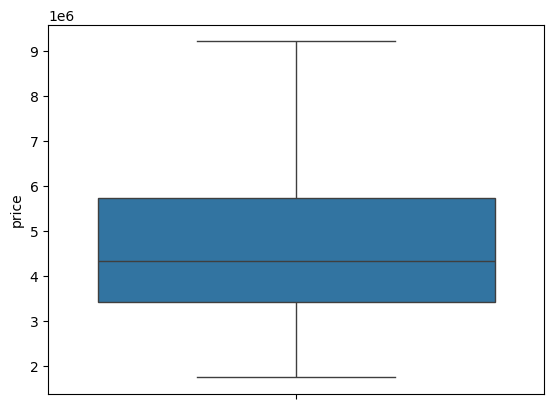

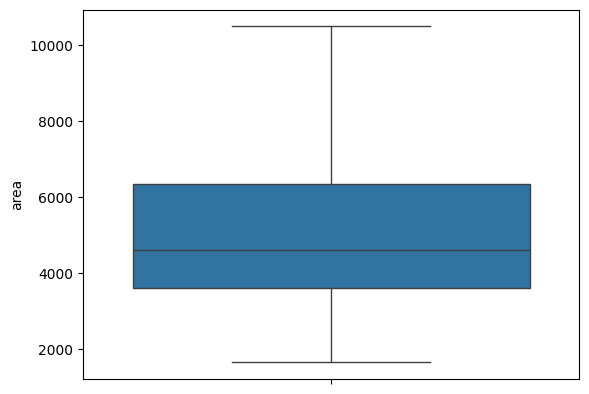

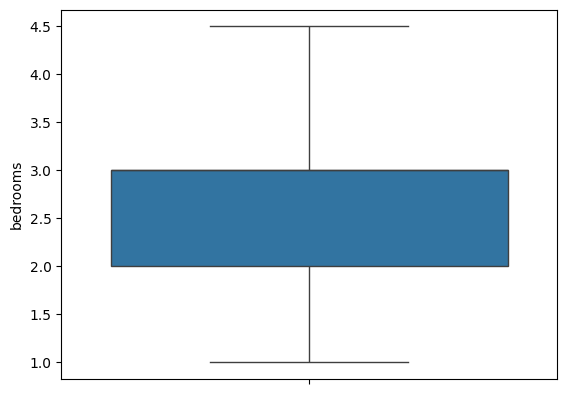

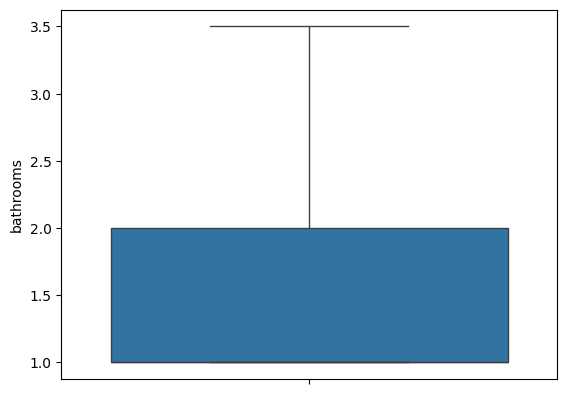

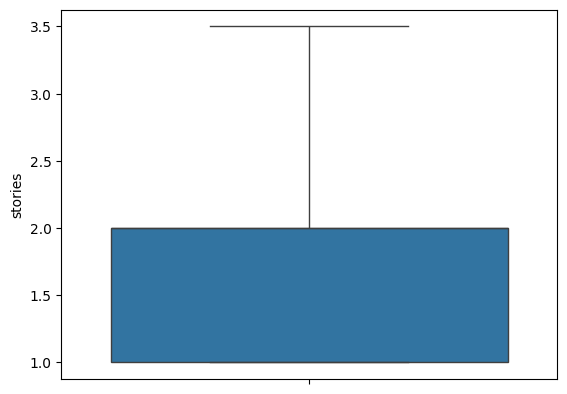

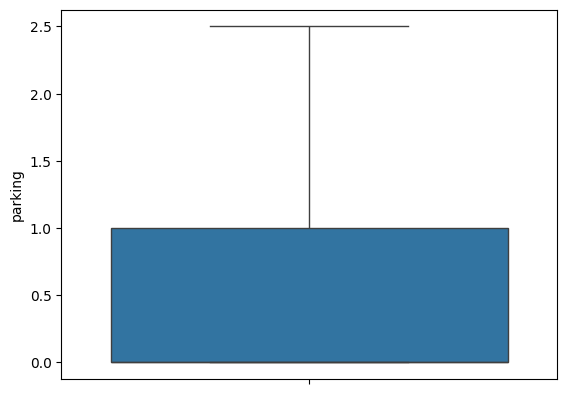

In [98]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

# ***Check for Duplicates***

In [99]:
#Check for Duplicates
df.duplicated().sum()

0

# ***Drop Low-Variance Columns***

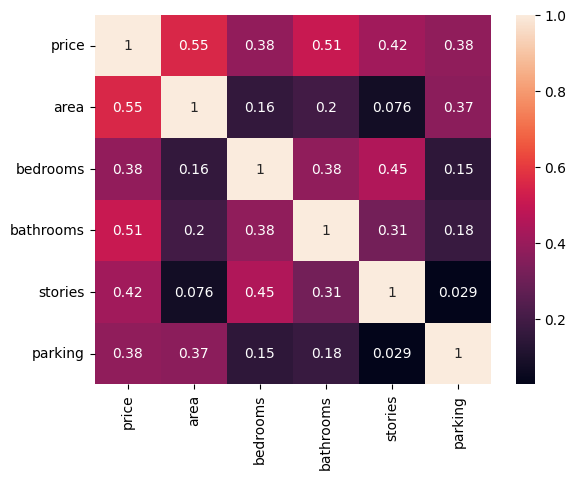

In [100]:
#correlation heatmap
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# ***Encoding Categorical Columns***

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Loop through each categorical column and apply Label Encoding
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df[col] = le.fit_transform(df[col])

In [103]:
df = pd.get_dummies(df, columns=['furnishingstatus'])

In [104]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,True,False,False
1,9205000,8960,4.0,3.5,3.5,1,0,0,0,1,2.5,0,True,False,False
2,9205000,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,False,True,False
3,9205000,7500,4.0,2.0,2.0,1,0,1,0,1,2.5,1,True,False,False
4,9205000,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,True,False,False


# ***Feature and Label Separation***

In [107]:
X = df.drop(columns=['price'])
y = df['price']


# **Model Building**

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [110]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 1286637069521.3794
R²: 0.6815169542374229


In [111]:
#Decision Trees Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()


decision_tree_model.fit(X_train, y_train)


y_pred = decision_tree_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 2034112162844.0366
R-squared: 0.4964934149718997


In [112]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 1480383927820.696
R-squared: 0.6335585275763205
